#  Аварии на шахтах

In [ ]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий.
Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1P7xUx8w8ujip0JBjJWbSgXykyBg_OO8S' -O 'coals.csv'

In [1]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

   year  count
1  1851      4
2  1852      5
3  1853      4
4  1854      1
5  1855      0

В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии.
Посмотрим на распределение числа аварий. 

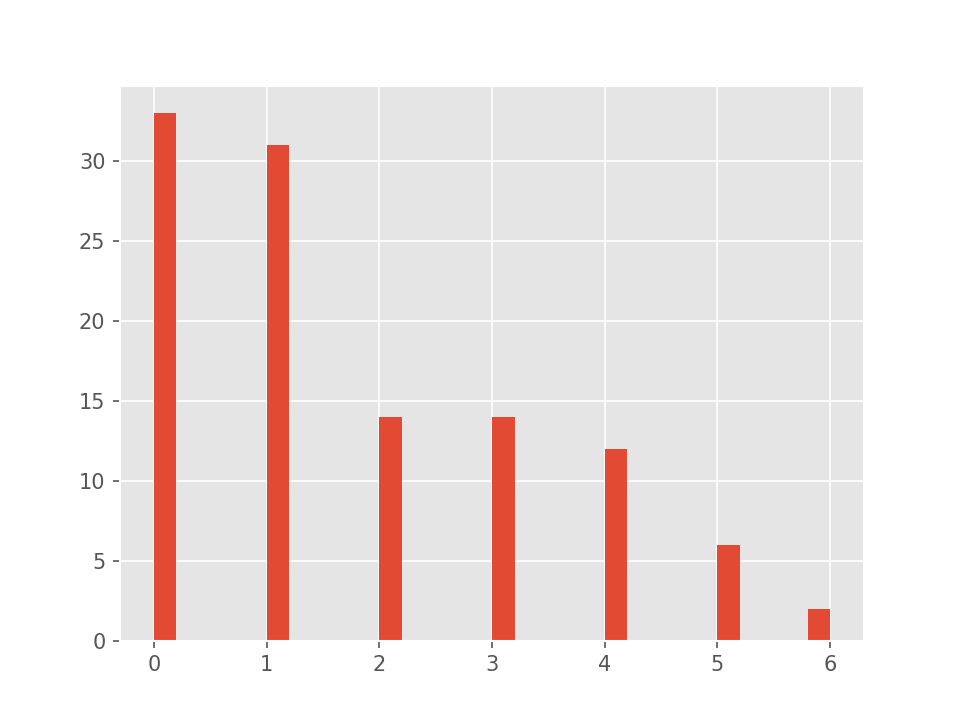

<AxesSubplot: >

In [2]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.
То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов.
Запишите получившийся результат в переменную `lambda_hat`.

In [3]:
n_hat = df.shape[0] # число наблюдений 
lam_hat = df["count"].sum() / n_hat # ваша оценка метода моментов
lam_hat

1.7053571428571428

In [ ]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 

__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение.
Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона.
Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт.
Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый.
Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [4]:
# Зачем тут делить? std = sqrt(var); Иначе тесты не проходят
lam_se = np.sqrt(lam_hat / n_hat) # ваша оценка
lam_se

0.1233953121525469

In [ ]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал.
Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала.
В переменную `delta` запишите его ширину.

In [ ]:
alpha = 0.10
left, right = sts.norm.interval(1 - alpha, loc=lam_hat, scale=lam_se)
delta = right - left

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это.
Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно.
Постройте оценку для $\lambda_2$ по данным после $1900$ года.
Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [ ]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

diff_hat = x.mean() - y.mean()
diff_se = np.sqrt(x.mean() / x.count() + y.mean() / y.count())

alpha = 0.05
left, right = sts.norm.interval(1 - alpha, loc=diff_hat, scale=diff_se)
delta = right - left

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

Ноль не вошёл в этот доверительный интервал.
Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение.
Найдите точечную оценку вероятности того, что произойдёт только одна авария.
В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [ ]:
def poiss_prob(k):
    if np.isscalar(k):
        return ((lam_hat ** k) / np.math.factorial(k)) * np.exp(-lam_hat)
    else:
        result = np.empty(len(k))
        for i in range(len(k)):
            result[i] = poiss_prob(k[i])
        return result

In [ ]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего.
С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [ ]:
def poiss_prob_d(k):
    if np.isscalar(k):
        return (((lam_hat ** (k-1)) * (k - lam_hat)) / np.math.factorial(k)) * np.exp(-lam_hat)
    else:
        result = np.empty(len(k))
        for i in range(len(k)):
            result[i] = poiss_prob_d(k[i])
        return result

prob_lam_hat = poiss_prob(1)
prob_lam_se = np.sqrt((lam_hat / n_hat) * (poiss_prob_d(1) ** 2))

alpha = 0.05
left, right = sts.norm.interval(1 - alpha, loc=prob_lam_hat, scale=prob_lam_se)
delta = right - left

In [ ]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти.
Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [ ]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    prob_ci_lam_hat = poiss_prob(k)
    prob_ci_lam_se = np.sqrt((lam_hat / n_hat) * (poiss_prob_d(k) ** 2))
    return sts.norm.interval(1 - alpha, loc=prob_ci_lam_hat, scale=prob_ci_lam_se)

In [ ]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

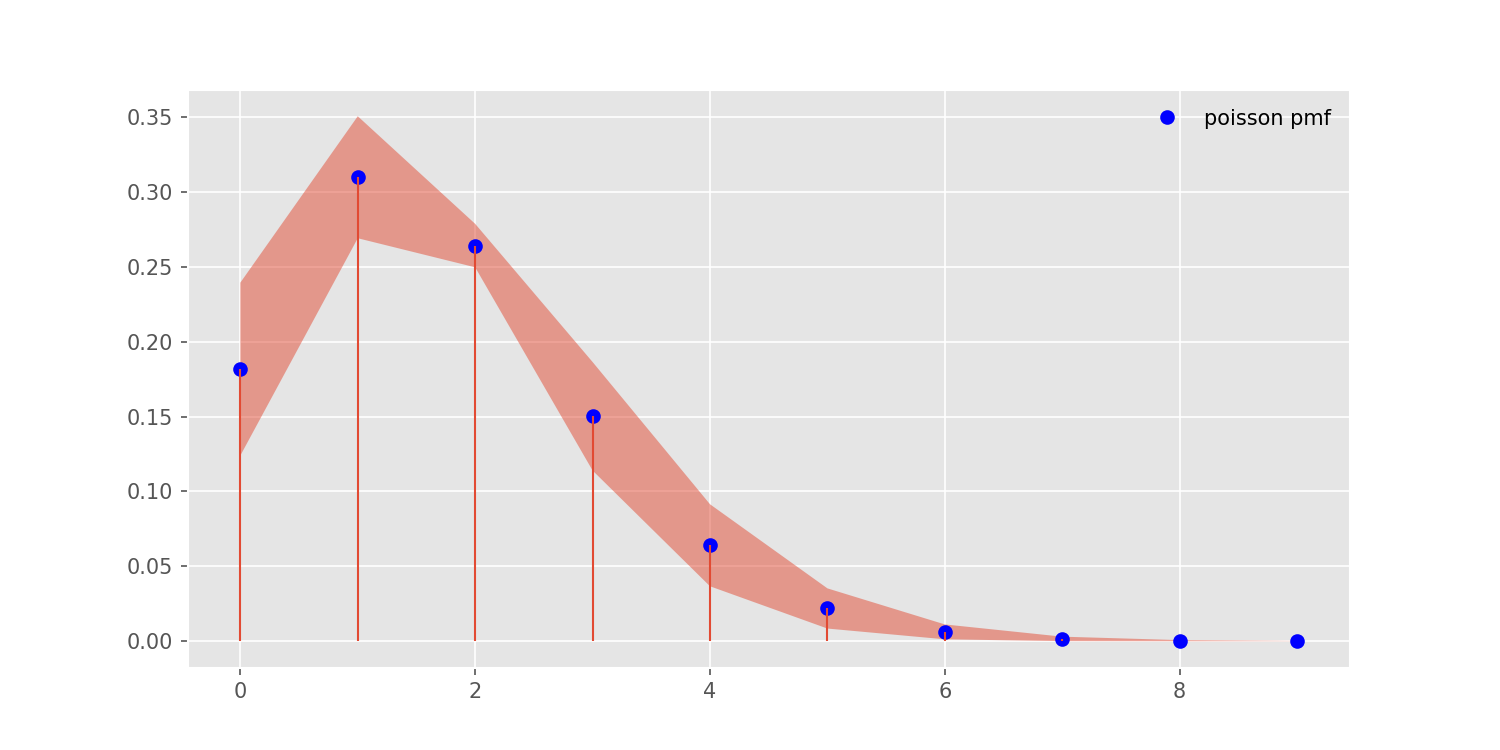

In [5]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = prob_ci(x)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [6]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.12395 и 0.23946
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.24971 и 0.27873
Вероятность P(X=3) лежит между  0.11396 и 0.18644
Вероятность P(X=4) лежит между  0.036649 и 0.091422
Вероятность P(X=5) лежит между  0.0084293 и 0.035252
Вероятность P(X=6) лежит между  0.0012388 и 0.011177
Вероятность P(X=7) лежит между  1.9936e-05 и 0.0030047
Вероятность P(X=8) лежит между  -5.5837e-05 и 0.00070061
Вероятность P(X=9) лежит между  -2.1966e-05 и 0.00014414


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс.
Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. 
Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [7]:
df['count'].mean()

1.7053571428571428

In [8]:
df['count'].var()

2.714205276705277

Отличие в два раза и небольшое - разные вещи.

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.